In [8]:
pip install pandas mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import mysql.connector

# MySQL connection settings
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123',     # replace with your MySQL password
    database='ecommerce_db'
)

# Example: Read order_items table
query = '''
SELECT 
    oi.order_id, oi.product_id, oi.quantity, oi.unit_price,
    p.product_name, p.category,
    o.order_date,
    c.customer_name, c.region,
    pay.amount, pay.payment_method
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN payments pay ON oi.order_id = pay.order_id
'''

# Load data into pandas DataFrame
df = pd.read_sql(query, connection)
connection.close()

# Show first 5 rows
print(df.head())


  order_id product_id  quantity  unit_price product_name     category  \
0   ORD001    PROD012         1      162.74   Product 12         Home   
1   ORD001    PROD002         2      159.26    Product 2     Clothing   
2   ORD002    PROD013         2      264.83   Product 13  Electronics   
3   ORD002    PROD016         1      485.10   Product 16     Clothing   
4   ORD002    PROD011         1      334.64   Product 11         Home   

   order_date customer_name region   amount payment_method  
0  2025-01-13   Customer 48   East   481.26    Credit Card  
1  2025-01-13   Customer 48   East   481.26    Credit Card  
2  2025-05-28   Customer 15   West  2760.45         PayPal  
3  2025-05-28   Customer 15   West  2760.45         PayPal  
4  2025-05-28   Customer 15   West  2760.45         PayPal  


C:\Users\HP\AppData\Local\Temp\ipykernel_17704\851356675.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [11]:
# Total Revenue
total_revenue = df['amount'].sum()

# Average Order Value
aov = df.groupby('order_id')['amount'].sum().mean()

# Top 5 Products
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head()

# Sales by Region
sales_by_region = df.groupby('region')['amount'].sum().sort_values(ascending=False)

# Monthly Sales Trend
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['amount'].sum()

# Display outputs
print("Total Revenue:", total_revenue)
print("Average Order Value:", round(aov, 2))
print("\nTop Products:\n", top_products)
print("\nSales by Region:\n", sales_by_region)
print("\nMonthly Sales:\n", monthly_sales)


Total Revenue: 354976.19
Average Order Value: 3549.76

Top Products:
 product_name
Product 13    39
Product 16    38
Product 10    33
Product 7     33
Product 11    30
Name: quantity, dtype: int64

Sales by Region:
 region
West     116221.12
East     104618.23
South     70002.74
North     64134.10
Name: amount, dtype: float64

Monthly Sales:
 order_date
2024-12    11849.20
2025-01    42956.28
2025-02    17022.78
2025-03    69718.49
2025-04    93591.17
2025-05    74259.91
2025-06    45578.36
Freq: M, Name: amount, dtype: float64


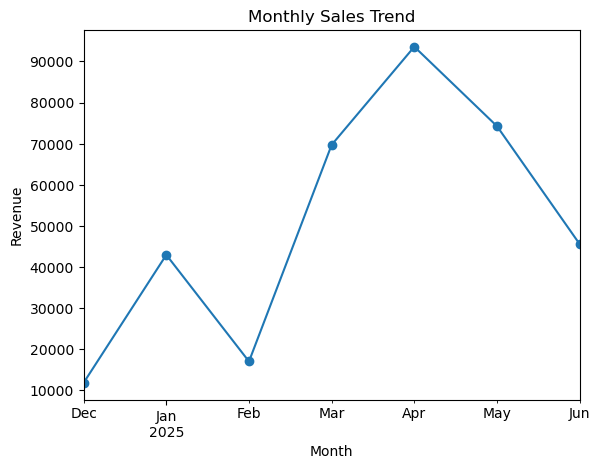

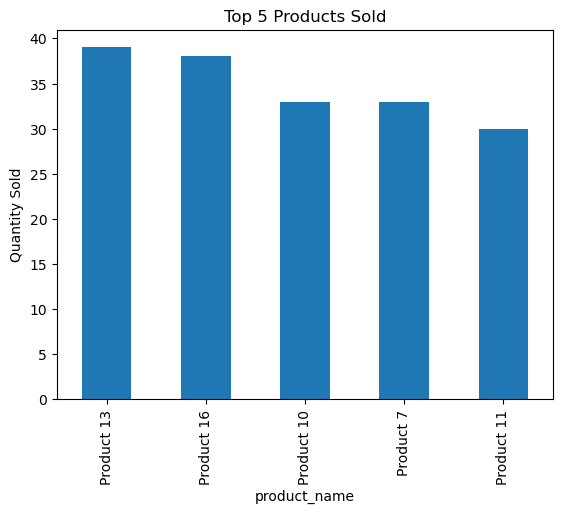

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Line Plot
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

# Top 5 Products Bar Plot
top_products.plot(kind='bar', title='Top 5 Products Sold')
plt.ylabel('Quantity Sold')
plt.show()


In [13]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)
